In [96]:
import getdist
from cobaya.yaml import yaml_load_file
from cobaya.run import run
from getdist import MCSamples, plots
from cobaya import load_samples
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

%matplotlib inline

from getdist.styles.planck import style_name
plots.set_active_style(style_name)

'planck'

In [25]:
full_chain_ACT = load_samples("../act_run_CMBonly/chains/act6lite", skip=0.1, to_getdist=True)
full_chain_planck = load_samples("../cosmology_run/chains/planck_reduced", skip=0.1, to_getdist=True)
full_chain_combined = load_samples("../act_planck_combined/chains/act_planck_reduced", skip=0.1, to_getdist=True)

# Create a subplot plotter instance for multi-parameter (triangle and 2D) plots.
g = plots.getSubplotPlotter()
sin = plots.get_single_plotter()

<Figure size 346.4x259.8 with 0 Axes>

In [103]:
chains_to_plot = [full_chain_ACT, full_chain_planck,full_chain_combined]
chain_labels = ['ACT', 'Planck','combined']
export_suffix = 'all'
color_seq = ['mediumpurple','cornflowerblue','darkorange']
line_args = [{'lw':1.5,'color':color_seq[0]},{'lw':1.5,'color':color_seq[1]},{'lw':1.5,'color':color_seq[2]}]
contour_colors = [color_seq[0],color_seq[1],color_seq[2]]

# chains_to_plot = [full_chain_planck]
# chain_labels = ['Planck']
# export_suffix = 'planck'
# color_seq = ['cornflowerblue']
# line_args = [{'lw':1.5,'color':color_seq[0]}]
# contour_colors = [color_seq[0]]

# chains_to_plot = [full_chain_ACT]
# chain_labels = ['ACT']
# export_suffix = 'act'
# color_seq = ['mediumpurple']
# line_args = [{'lw':1.5,'color':color_seq[0]}]
# contour_colors = [color_seq[0]]

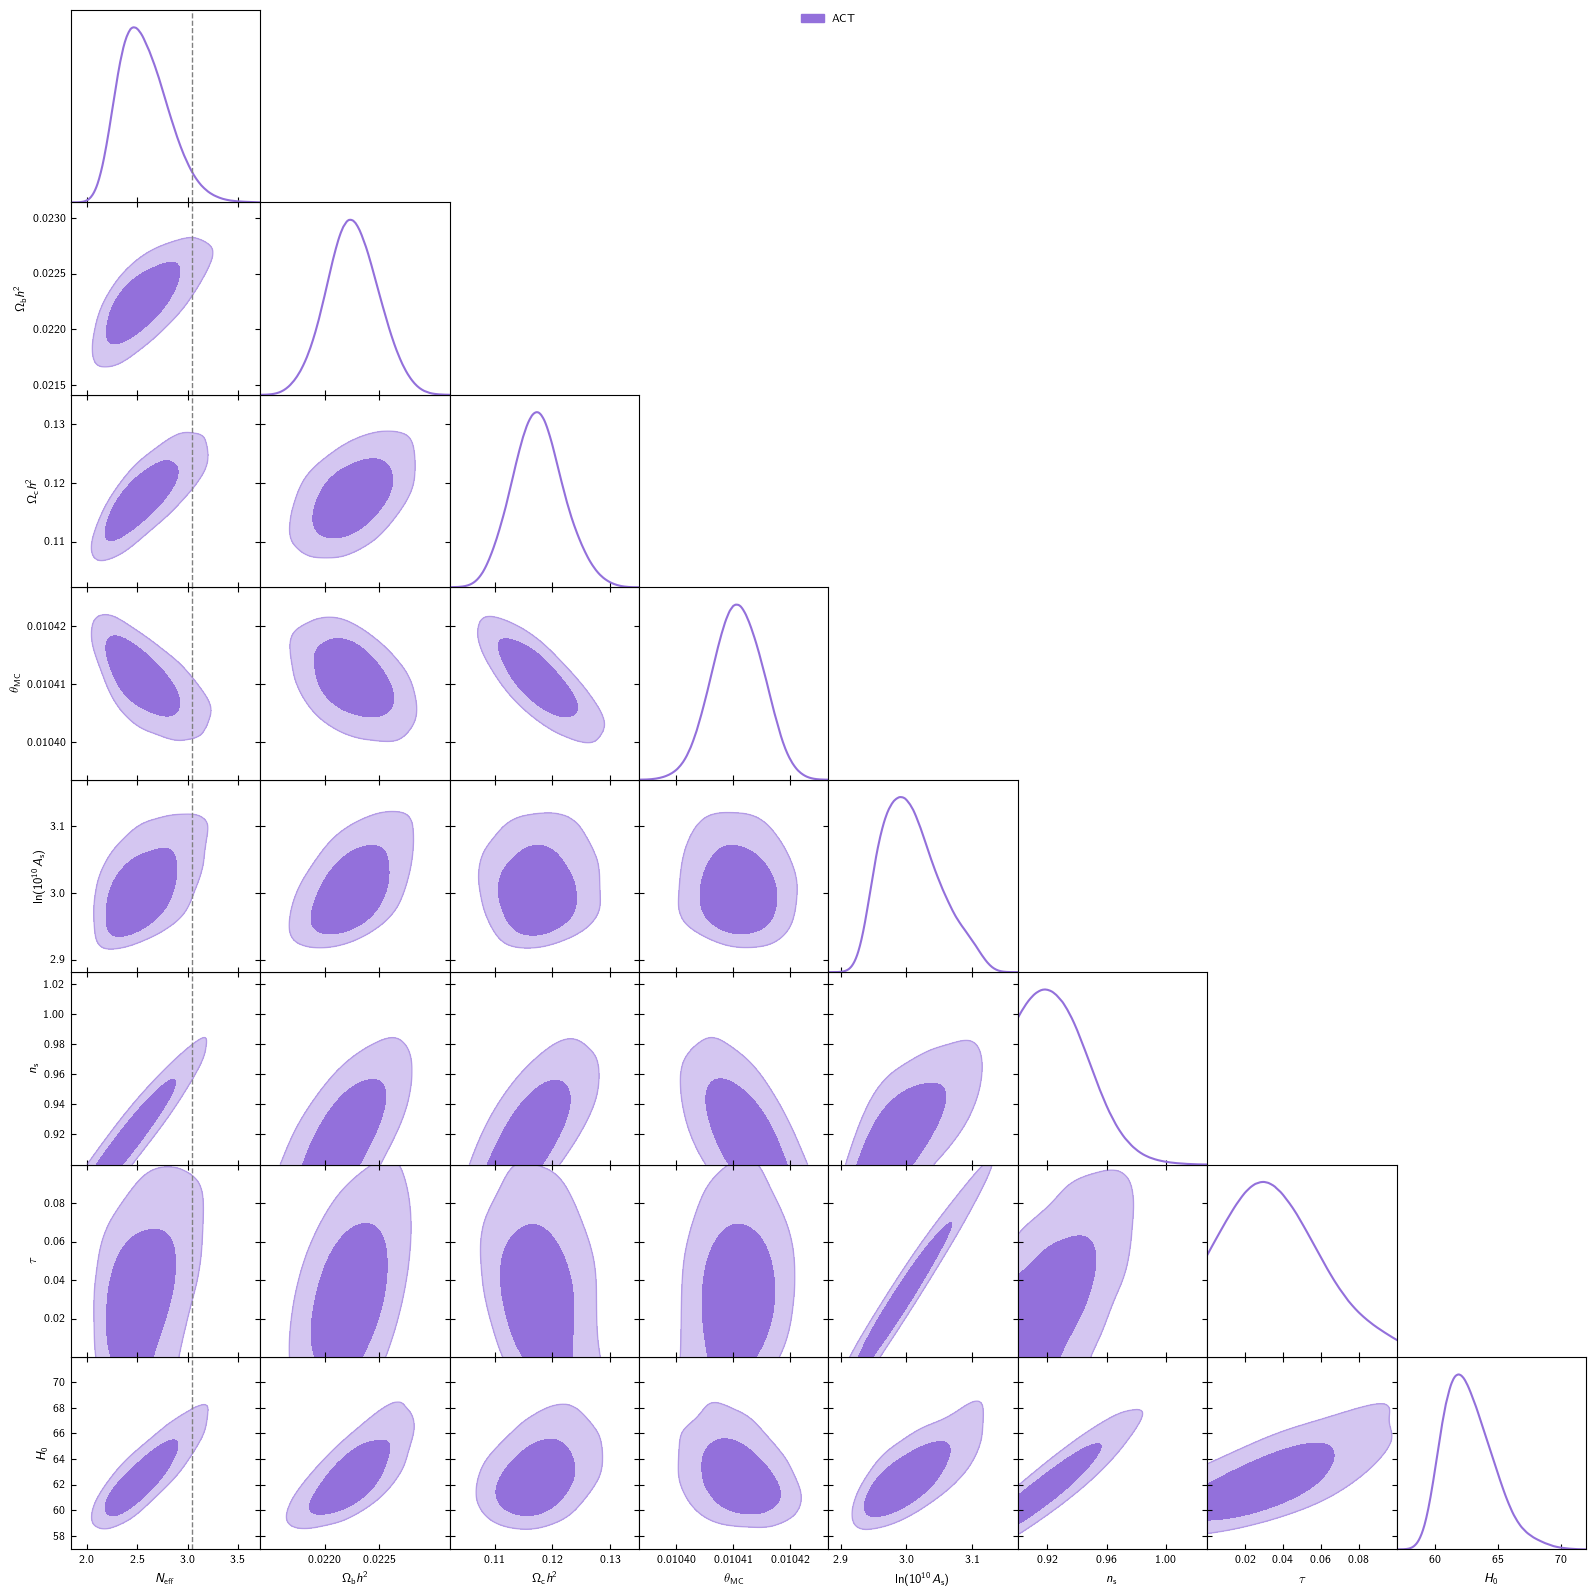

In [92]:
# 1. Triangle Plot (Corner Plot) of All Parameters
g.triangle_plot(chains_to_plot, 
                params=['nnu', 'ombh2', 'omch2', 'cosmomc_theta', 'logA', 'ns', 'tau', 'H0'], 
                filled=True, 
                legend_labels=chain_labels, 
                #colors=['cornflowerblue','green','red'],
                markers={'nnu':3.044}, marker_args={'lw': 1},
                line_args=line_args, 
                contour_colors=contour_colors)
g.export('triangle_plot_all'+export_suffix+'.pdf')
plt.show()

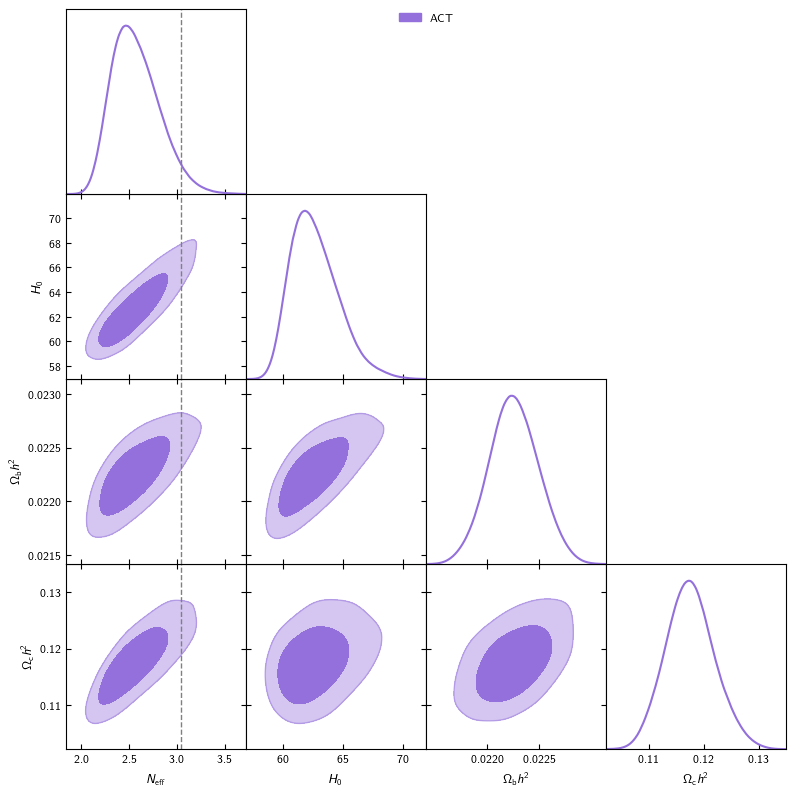

In [93]:
# 1. Triangle Plot (Corner Plot) of All Parameters
g.triangle_plot(chains_to_plot, 
                params=['nnu','H0*','ombh2','omch2'], 
                filled=True, 
                legend_labels=chain_labels, 
                #colors=['cornflowerblue','green','red'],
                markers={'nnu':3.044}, marker_args={'lw': 1},
                line_args=line_args, 
                contour_colors=contour_colors)
g.export('triangle_plot_reduced'+export_suffix+'.pdf')
plt.show()

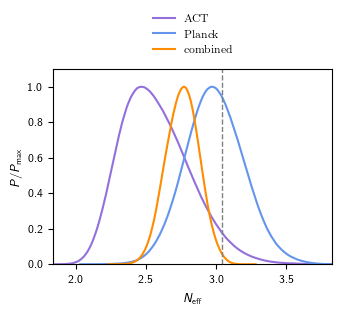

In [104]:
# 2. 1D Marginalized Plot for N_eff (assuming parameter is called 'nnu')
sin.plots_1d(chains_to_plot, params=['nnu'], filled=True, legend_labels=chain_labels, markers={'nnu':3.044}, marker_args={'lw': 1}, line_args=line_args)
sin.export('nnu_1d'+export_suffix+'.pdf')
plt.show()

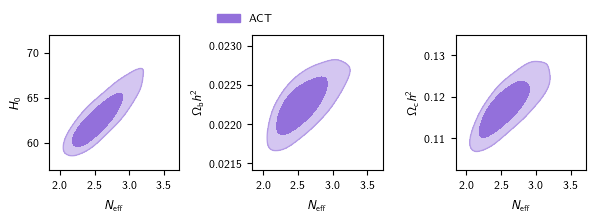

In [95]:
# 3. 2D Contour Plot: For example, N_eff vs H_0 (make sure parameter names match your chain)
g.plots_2d(chains_to_plot,  param_pairs=[['nnu', 'H0'],['nnu', 'ombh2'],['nnu', 'omch2']],nx=3, filled=True,legend_labels=chain_labels, markers={'nnu':3.044}, marker_args={'lw': 1}, colors=contour_colors)
g.export('nnu_H0_2d'+export_suffix+'.pdf')
plt.show()

In [105]:
# 5. Print summary statistics for all parameters
summary = full_chain_ACT.getMargeStats()
print(summary)

summary = full_chain_planck.getMargeStats()
print(summary)

summary = full_chain_combined.getMargeStats()
print(summary)

Marginalized limits: 0.68; 0.95; 0.99

parameter                      mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
nnu                            2.5693029E+00  2.4787148E-01  2.2798673E+00  2.7612646E+00  two    2.1322286E+00  3.0657443E+00  two    2.0517990E+00  3.2733634E+00  two     N_{\mathrm{eff}}
ombh2                          2.2255399E-02  2.3770231E-04  2.2021800E-02  2.2493294E-02  two    2.1790852E-02  2.2736206E-02  two    2.1666735E-02  2.2856443E-02  two     \Omega_{\mathrm{b}} h^2
omch2                          1.1754607E-01  4.4410370E-03  1.1286517E-01  1.2168806E-01  two    1.0919037E-01  1.2653562E-01  two    1.0723655E-01  1.2961296E-01  two     \Omega_{\mathrm{c}} h^2
cosmomc_theta                  1.0410806E-02  4.4374161E-06  1.0406328E-02  1.0415396E-02  two    1.0402098E-02  1.0419281E-02  two    1.0399065E-02  1.0421921E-02  two     \theta_\mathrm{MC}
logA        